# Steven Rae - Machine Learning Capstone Project - Step 5

## Using Regression Techniques

**Question to be Answered:** 

Using regression techniques. Want to try and predict income based on three things:
age
length of essay1 ('What I'm doing with my life')
length of essay2 ('I'm really good at')

Define inputs and load the OKCupid data into a pandas dataframe:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report

okcupidDF = pd.read_csv("profiles.csv")

Checking the data using code defined in step 1, there are no NaNs in age column.
Also, there are 48442 people that did not report income (eg they entered -1)
So, out of a total of 59946 entries in the DataFrame, only 11,504 entries
that can be used to test this stuff out.

Removing NaNs from essay1 and essay2 and adding the length of each essay to the okcupidDF dataframe:

In [2]:
okcupidDF['essay1'] = okcupidDF['essay1'].replace(np.nan, '', regex=True)
okcupidDF['essay2'] = okcupidDF['essay2'].replace(np.nan, '', regex=True)

okcupidDF['essay1_length'] = okcupidDF['essay1'].str.len()
okcupidDF['essay2_length'] = okcupidDF['essay2'].str.len()

Create a new dataframe by removing all rows with no reported income:

In [3]:
okcupidDF_with_income = okcupidDF.loc[okcupidDF['income'] >= 0 ]

Create a dataframe that's a subset of the okcupidDF_with_income. This new dataframe will be the input to the regression models:

In [4]:
feature_data = okcupidDF_with_income[['income', 'age', 'essay1_length', 'essay2_length']]

Look at each of the income predictors individually via Linear Regression(starting with age vs income):

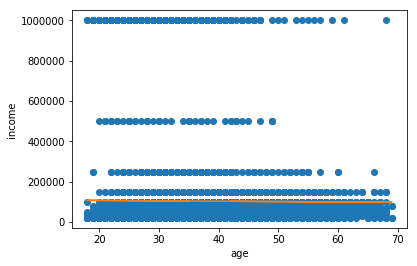

<Figure size 432x288 with 0 Axes>

In [5]:
X = feature_data[['age']]

y = feature_data[['income']]

plt.plot(X, y, 'o')
plt.xlabel('age')
plt.ylabel('income')
income_age_line_fitter = LinearRegression()
income_age_line_fitter.fit(X, y)
income_predict = income_age_line_fitter.predict(X)
plt.plot(X, income_predict, '-')
plt.show()
plt.clf()

Linear Regression essay 2 length vs income:

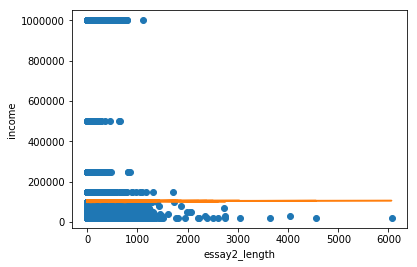

<Figure size 432x288 with 0 Axes>

In [6]:
X = feature_data[['essay2_length']]
plt.xlabel('essay2_length')
plt.ylabel('income')
plt.plot(X, y, 'o')
income_essay2length_line_fitter = LinearRegression()
income_essay2length_line_fitter.fit(X, y)
income__predict = income_essay2length_line_fitter.predict(X)
plt.plot(X, income_predict, '-')
plt.show()
plt.clf()

Linear Regression essay 1 length vs income:

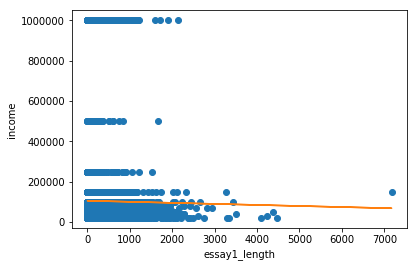

<Figure size 432x288 with 0 Axes>

In [7]:
X = feature_data[['essay1_length']]
plt.xlabel('essay1_length')
plt.ylabel('income')
plt.plot(X, y, 'o')
income_essay1length_line_fitter = LinearRegression()
income_essay1length_line_fitter.fit(X, y)
income_predict = income_essay1length_line_fitter.predict(X)
plt.plot(X, income_predict, '-')
plt.show()
plt.clf()

After reviewing the plots, age definitely does not look like it's contributing anything to predicting income. However, will keep it in the analysis for now. Also, VERY high incomes seem to represent a significant data outlier in each of the plots. Thinking it would be best to remove these people from further analysis (percentage wise these folks also represent a very small portion of all folks who reported incomes). Probably makes sense anyway, as these people's incomes are most likely gained from participating in very non-typical careers (eg. Politicians, CEO's, Professional Sports, Music Stars, CRIMINALS....LOL).

Re-Define okcupidDF_with_income and feature_data dataframes to also remove VERY high income:

In [8]:
okcupidDF_with_income = okcupidDF.loc[(okcupidDF['income'] >= 0) & (okcupidDF['income'] < 900000)]

feature_data = okcupidDF_with_income[['income', 'age', 'essay1_length', 'essay2_length']]

Normalize the data before creating training and validation datasets:

In [9]:
x = feature_data.values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

/Users/steverae/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Create training and validation sets, validation set should be 25% of data by default:

In [10]:
X = feature_data[['age', 'essay1_length', 'essay2_length']]

y = feature_data[['income']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

Running Standard Linear Regression. Show Train and Test scores and Coefficients:

In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

print('Train Score:', model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))
# print(feature_data.columns)
coefficient_features = ['age', 'essay1_length', 'essay2_length']
print(sorted(list(zip(coefficient_features, model.coef_[0])),key = lambda x: abs(x[1]),reverse=True))

Train Score: 0.07401626062472799
Test Score: 0.07207209960748351
[('age', 0.1495091761772915), ('essay2_length', -0.14629688886781694), ('essay1_length', -0.002462025153133259)]


Next, plot the predicted income vs. the reported incomes in the test set:

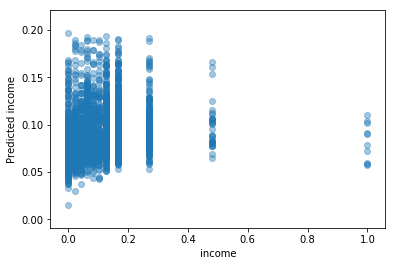

<Figure size 432x288 with 0 Axes>

In [12]:
y_predicted = model.predict(X_test)

plt.scatter(y_test,y_predicted, alpha=0.4)
plt.xlabel('income')
plt.ylabel('Predicted income')
plt.show()
plt.clf()

Well... The R Squared scores and independent variable coefficients suggest there is little to learn about predicting income from these particular independent variables. Very large amount of variance in the data points. Looks like another failed experiment. However, will continue and try things out using K Neighbors Regression to see if anything might pop up. First off, try to find a good value for k:

[1, -0.7236968722415289]
[2, -0.35558768515267314]
[3, -0.21433399356171012]
[4, -0.1760410749963459]
[5, -0.11332235461758788]
[6, -0.0784301823613478]
[7, -0.05785133003963905]
[8, -0.03916170010949882]
[9, -0.024023008268589052]
[10, -0.012856415835698076]
[11, -0.0013239800164734916]
[12, 0.008727090883280275]
[13, 0.020377896842359244]
[14, 0.030436402151747255]
[15, 0.035804399077957516]
[16, 0.04433323798934474]
[17, 0.05070894169889506]
[18, 0.053561851988641385]
[19, 0.05644312168294674]
[20, 0.056941461302245644]
[21, 0.061286121504330215]
[22, 0.06398869565909615]
[23, 0.06563637332633676]
[24, 0.06560507616488831]
[25, 0.06627157980514065]
[26, 0.06976739057132975]
[27, 0.07342262641814357]
[28, 0.07439474906175492]
[29, 0.07724234770522607]
[30, 0.07779748177610646]
[31, 0.07976857322745357]
[32, 0.08043078521848157]
[33, 0.08151169308879302]
[34, 0.08271902968186595]
[35, 0.08317527008858916]
[36, 0.08429938512096025]
[37, 0.08525315076392348]
[38, 0.0854566752296152]
[39

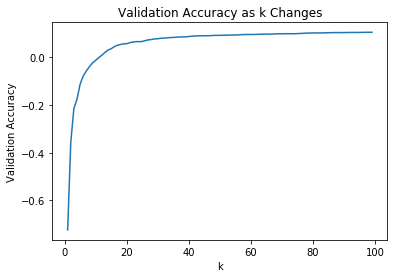

<Figure size 432x288 with 0 Axes>

In [19]:
K_AccuracyScoreDF = pd.DataFrame()

for k in range(1, 100):
    regressor = KNeighborsRegressor(n_neighbors = k, weights = "distance")
    regressor.fit(X_train,y_train)
    score = regressor.score(X_test,y_test)
    score_list = [k, score]
    print(score_list)
    K_AccuracyScoreDF = K_AccuracyScoreDF.append({'KValue': k, 'Accuracy': score}, ignore_index=True)
    
print(K_AccuracyScoreDF.head())

plt.plot(K_AccuracyScoreDF['KValue'], K_AccuracyScoreDF['Accuracy'])
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as k Changes')
plt.show()
plt.clf()

Looks like our optimum k value is over 90 for this dataset. Let's look at the details:

Train Score: 0.9112502984811162
Test Score: 0.10377986651423864


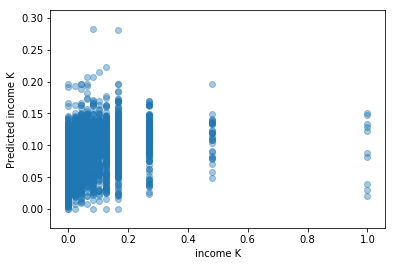

<Figure size 432x288 with 0 Axes>

In [20]:
regressor = KNeighborsRegressor(n_neighbors = 90, weights = "distance")
regressor.fit(X_train,y_train)

print('Train Score:', regressor.score(X_train,y_train))
print('Test Score:', regressor.score(X_test,y_test))

y_predicted = regressor.predict(X_test)

plt.scatter(y_test,y_predicted, alpha=0.4)
plt.xlabel('income K')
plt.ylabel('Predicted income K')
plt.show()
plt.clf()

## Step 5 Conclusions:

Looks like we still have a bad result for this analysis. The Train score is way higher than the test score so looks like our data in this case is very overfitted. This data set seems to have a very large portion of people with incomes at the lower end of the scale. Also, the fact that so many ok cupid users chose not to report their income suggests that they may not be very proud of those numbers.

A majority of users in the dataset are under 40 so that may reflect lower incomes and further imbalance the data. 

It would be great if OK Cupid had a 'high rollers' version of their service that they could combine for a more balanced dataset.